In [17]:
%matplotlib inline

from torch.utils.data import Dataset, DataLoader
import torchvision.datasets as datasets
from tqdm.notebook import tqdm as tqdm
from torchvision import transforms
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch import utils
import torch.nn as nn
import numpy as np
import os, imageio
import pickle
import torch
import cv2

### Model

In [18]:
import gc

gc.collect()

torch.cuda.empty_cache()

In [24]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [25]:
class Net(nn.Module):
    def __init__(self,input_dim):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_dim, 50) # input has 4 dimensions.
        self.fc1_drop = nn.Dropout(0.2)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(50, 50)
        self.fc2_drop = nn.Dropout(0.2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(50,1)

    def forward(self, x):
        # x = x.view(-1,4) # input has 4 dimensions.
        x = self.relu1(self.fc1(x))
        x = self.fc1_drop(x)
        x = self.relu2(self.fc2(x))
        x = self.fc2_drop(x)
        return self.fc3(x)

In [27]:
model = Net(128)
model.to(device)

model.load_state_dict(torch.load('../weights/1.pth'))

for param in model.parameters():
  print(param.data)

RuntimeError: CUDA error: out of memory
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


### Dictionary


In [ ]:
with open('fox_gamma10_300_1-241.pickle', 'rb') as handle:
    new_dict = pickle.load(handle)

for k in new_dict:
    keys = k

plt.imshow(new_dict[keys][2][299])
plt.show

### MNIST loader


In [2]:
mnist_trans = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0, 1.0),
    transforms.CenterCrop((28))
])

In [3]:
mnist= datasets.MNIST(root='./../data', train=True,download=False, transform=mnist_trans)
mnist = torch.utils.data.random_split(mnist, [10000, len(mnist)-10000])[0] # gets split into two parts [10k and 50k] and we slice 0 index.


In [81]:
# x, _ = mnist[7777] # x is now a torch.Tensor
# plt.figure(figsize=(10, 10))
# plt.imshow(x.numpy()[0], cmap='gray')

In [83]:
def generate_pixel_coordinates(img):
    
    height, width, _ = img.permute(1,2,0).shape
    
    # Generate coordinates along the x-axis and y-axis
    x_coords = np.linspace(0, 1, width, endpoint=False)
    y_coords = np.linspace(0, 1, height, endpoint=False)
    
    # Create a meshgrid of coordinates
    x_mesh, y_mesh = np.meshgrid(x_coords, y_coords)
    
    # Stack the coordinates and reshape to obtain the final output
    coordinates = np.stack([x_mesh, y_mesh], axis=-1)
    
    return coordinates

In [84]:
l = generate_pixel_coordinates(x)

  0%|          | 0/10000 [00:00<?, ?it/s]

Index 0


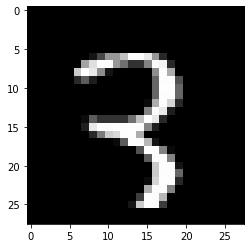

Index 1000


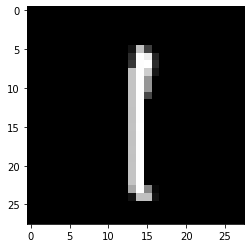

Index 2000


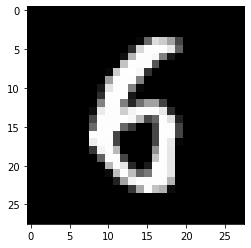

Index 3000


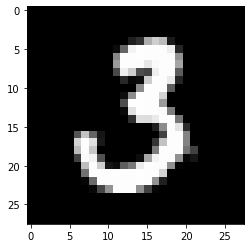

Index 4000


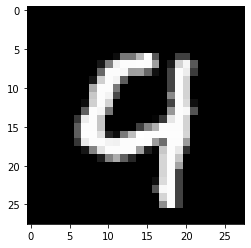

Index 5000


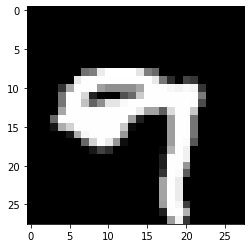

Index 6000


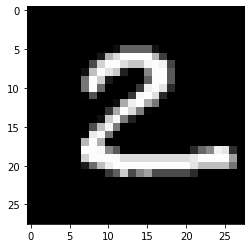

Index 7000


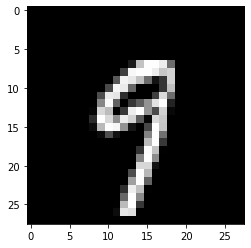

Index 8000


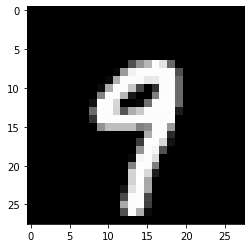

Index 9000


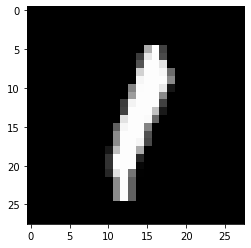

In [89]:
for index in tqdm(range(len(mnist))):
    
    x,_ = mnist[index]

    if index%1000 == 0:
        print('Index %d' % (index))
        plt.imshow(x.numpy()[0], cmap='gray')
        plt.show()